# CommunityLM

This is a replication of the experiments from [CommunityLM](https://arxiv.org/abs/2209.07065) (Jiang et al. 2022), which probes partisan worldviews from language models, based on the [original repo](https://github.com/hjian42/communitylm).

Running all the experiments on a single GPU takes about 3-4 hours.

Before running the notebook, please install requirements and download the data.
```bash
pip install -r requirements.txt
bash download_data.sh
```

In [1]:
from llments.lm.base.hugging_face import HuggingFaceLM, HuggingFaceLMFitter
from llments.lm.base.dataset_lm import load_from_text_file
from llments.eval.sentiment import HuggingFaceSentimentEvaluator
import pandas as pd
import numpy as np
from community_lm_constants import politician_feelings, groups_feelings, anes_df
from community_lm_utils import generate_community_opinion, compute_group_stance

device = 'cuda:0'  # change to 'mps' if you have a mac, or 'cuda:0' if you have an NVIDIA GPU 

## Train a CommunityLM model (optional)

The CommunityLM paper has released their pre-trained models on Hugging Face, so for the purpose of this notebook, we will use the pre-trained models. However, if you want to train a CommunityLM model from scratch, you can download training data to `data/{democrat,republican}-tweets.txt`, uncomment the following lines, and replace the `lm_name` variable in the following cell with `./data/{party}-twitter-gpt2`.

In [6]:
base_model = HuggingFaceLM("gpt2", device=device)
for party in ['dem', 'repub']:
    dataset = load_from_text_file(f"data/{party}_4.7M_tweets.txt")
    fit_model = HuggingFaceLMFitter.fit(base_model, dataset, output_dir=f"data/{party}-twitter-gpt2")

FileNotFoundError: [Errno 2] No such file or directory: 'data/democratic_4.7M_tweets.txt'

## Generate Opinions using CommunityLM

The following code generates opinions using CommunityLM.

In [7]:
for run in range(1, 6):
    for party in ['democrat', 'republican']:
        # This uses the pre-trained communitylm, but you can uncomment if you trained your own model
        # lm_name = f'CommunityLM/{party}-twitter-gpt2'
        lm_name = f'./data/{party[:-5]}-twitter-gpt2'
        lm = HuggingFaceLM(lm_name, device=device)
        for prompt_option in ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4']:
            print(f'generating {party} opinion for {prompt_option} run {run}...')
            output_path = f'output/CommunityLM_{party}-twitter-gpt2/run_{run}'
            generate_community_opinion(lm, prompt_option, output_path, run)

generating democrat opinion for Prompt1 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 7531.97it/s]


generating democrat opinion for Prompt2 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 11896.48it/s]


generating democrat opinion for Prompt3 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 14777.35it/s]


generating democrat opinion for Prompt4 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13582.59it/s]


generating republican opinion for Prompt1 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12124.60it/s]


generating republican opinion for Prompt2 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13182.73it/s]


generating republican opinion for Prompt3 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13084.03it/s]


generating republican opinion for Prompt4 run 1...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13160.67it/s]


generating democrat opinion for Prompt1 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 11311.50it/s]


generating democrat opinion for Prompt2 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12196.29it/s]


generating democrat opinion for Prompt3 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12855.45it/s]


generating democrat opinion for Prompt4 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12366.50it/s]


generating republican opinion for Prompt1 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12609.39it/s]


generating republican opinion for Prompt2 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12683.11it/s]


generating republican opinion for Prompt3 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13145.54it/s]


generating republican opinion for Prompt4 run 2...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12809.64it/s]


generating democrat opinion for Prompt1 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12233.05it/s]


generating democrat opinion for Prompt2 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12965.39it/s]


generating democrat opinion for Prompt3 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13138.68it/s]


generating democrat opinion for Prompt4 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12565.32it/s]


generating republican opinion for Prompt1 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 11989.43it/s]


generating republican opinion for Prompt2 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 10810.06it/s]


generating republican opinion for Prompt3 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13135.93it/s]


generating republican opinion for Prompt4 run 3...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12862.02it/s]


generating democrat opinion for Prompt1 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12102.44it/s]


generating democrat opinion for Prompt2 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12842.33it/s]


generating democrat opinion for Prompt3 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13225.68it/s]


generating democrat opinion for Prompt4 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13155.16it/s]


generating republican opinion for Prompt1 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12169.16it/s]


generating republican opinion for Prompt2 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13099.01it/s]


generating republican opinion for Prompt3 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13308.21it/s]


generating republican opinion for Prompt4 run 4...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13152.41it/s]


generating democrat opinion for Prompt1 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12644.87it/s]


generating democrat opinion for Prompt2 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 12795.31it/s]


generating democrat opinion for Prompt3 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13572.34it/s]


generating democrat opinion for Prompt4 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13449.03it/s]


generating republican opinion for Prompt1 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 10524.35it/s]


generating republican opinion for Prompt2 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 11926.93it/s]


generating republican opinion for Prompt3 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 13373.27it/s]


generating republican opinion for Prompt4 run 5...


Generating opinions: 100%|██████████| 30/30 [00:00<00:00, 9595.75it/s]


## Perform Group-level Sentiment Analysis

In [8]:
evaluator = HuggingFaceSentimentEvaluator(
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=device
)
for party in ['democrat', 'republican']:
    compute_group_stance(
        evaluator=evaluator,
        data_folder=f'output/CommunityLM_{party}-twitter-gpt2',
        output_filename=f'output/CommunityLM_{party}-twitter-gpt2/stance_prediction.csv',
    )

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
df_dem = pd.read_csv("output/CommunityLM_democrat-twitter-gpt2/stance_prediction.csv")
df_repub = pd.read_csv("output/CommunityLM_republican-twitter-gpt2/stance_prediction.csv")

## Preparing ANES2020 Questions

This is data from the American National Election Study (ANES)

Website: https://electionstudies.org/
Email:   anes@electionstudies.org


In [ ]:
df = pd.read_csv("data/anes_pilot_2020ets_csv.csv")

print(f"Number of Rows Total {df.shape}")

# only look self identified partisans 2144/3080. 1: Republican; 2: Democrat
df = df[df.pid1r < 3]
df.pid1r = df.pid1r.map({1: "Republican", 2: "Democrat"})
print(f"Number of Rows for Partisans {df.shape}")

Number of Rows Total (3080, 470)
Number of Rows for Partisans (2144, 470)


In [4]:
# 999 stands for missing values and 'pid1r' is the partisanship
df_politician_results = df[['pid1r']+politician_feelings+groups_feelings].replace(999, np.nan).groupby("pid1r").mean().T
df_politician_results['is_repub_leading'] = (df_politician_results.Republican > df_politician_results.Democrat)
# df_politician_results


In [5]:
df_politician_results['Prompt1'] = anes_df['Prompt1'].to_list()
df_politician_results['Prompt2'] = anes_df['Prompt2'].to_list()
df_politician_results['Prompt3'] = anes_df['Prompt3'].to_list()
df_politician_results['Prompt4'] = anes_df['Prompt4'].to_list()

df_politician_results['pid'] = df_politician_results.index
df_politician_results.to_csv("output/anes2020_pilot_prompt_probing.csv", index=False)
# df_politician_results

In [6]:
df_politician_results['diff'] = (df_politician_results.Democrat-df_politician_results.Republican).apply(abs)
df_politician_results.sort_values(by=['diff'])

pid1r,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,diff
ftasian,68.945549,63.443756,False,Asian people,Asian people are,Asian people are a,Asian people are the,ftasian,5.501792
ftwhite,71.250000,77.156540,True,White people,White people are,White people are a,White people are the,ftwhite,5.906540
fthisp,71.269363,63.595876,False,Hispanic people,Hispanic people are,Hispanic people are a,Hispanic people are the,fthisp,7.673487
ftfauci1,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,8.393979
ftblack,76.219638,66.510309,False,Black people,Black people are,Black people are a,Black people are the,ftblack,9.709329
ftrubio1,31.522052,43.008547,True,Marco Rubio,Marco Rubio is,Marco Rubio is a,Marco Rubio is the,ftrubio1,11.486495
ftcapitalists,46.675652,60.533054,True,capitalists,capitalists are,capitalists are a,capitalists are the,ftcapitalists,13.857401
ftbigbusiness,43.142114,57.847826,True,big business,big business is,big business is a,big business is the,ftbigbusiness,14.705712
ftlaborunions,60.672474,44.870466,False,labor unions,labor unions is,labor unions is a,labor unions is the,ftlaborunions,15.802008
fthaley1,29.860531,47.069714,True,Nikki Haley,Nikki Haley is,Nikki Haley is a,Nikki Haley is the,fthaley1,17.209183


## Evaluate fine-tuned GPT-2 CommunityLM models

This evaluates the sentiment of the completions generated by each model according to a sentiment classification model.

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def compute_scores(df_anes, df_dem, df_repub):
    df_repub['prediction'] = (df_repub['group_sentiment'] > df_dem['group_sentiment'])

    gold_labels = df_anes.is_repub_leading.astype(int).values
    rows = []
    for run in range(1, 6):
        run = "run_{}".format(run)
        for prompt_format in range(1, 5):
            prompt_format = "Prompt{}".format(prompt_format)
            df_ = df_repub[(df_repub.run == run) & (df_repub.prompt_format == prompt_format)]
            pred_labels = df_.prediction.astype(int).values
            acc = accuracy_score(gold_labels, pred_labels) 
            p, r, f1, _ = precision_recall_fscore_support(gold_labels, pred_labels, average='weighted')
            rows.append([run, prompt_format, acc, p, r, f1])
    df_scores = pd.DataFrame(rows, columns=["run", "prompt_format", "accuracy", "precision", "recall", "f1"])
    return df_scores

In [8]:
df_repub

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment
0,0,CommunityLM_republican-twitter-gpt2,run_1,Prompt1,fttrump1,41.85
1,1,CommunityLM_republican-twitter-gpt2,run_1,Prompt1,ftobama1,34.30
2,2,CommunityLM_republican-twitter-gpt2,run_1,Prompt1,ftbiden1,26.70
3,3,CommunityLM_republican-twitter-gpt2,run_1,Prompt1,ftwarren1,34.40
4,4,CommunityLM_republican-twitter-gpt2,run_1,Prompt1,ftsanders1,37.65
...,...,...,...,...,...,...
595,595,CommunityLM_republican-twitter-gpt2,run_5,Prompt4,ftcapitalists,8.20
596,596,CommunityLM_republican-twitter-gpt2,run_5,Prompt4,ftbigbusiness,62.25
597,597,CommunityLM_republican-twitter-gpt2,run_5,Prompt4,ftlaborunions,26.80
598,598,CommunityLM_republican-twitter-gpt2,run_5,Prompt4,ftrepublicanparty,11.00


In [9]:
df = pd.read_csv("output/anes2020_pilot_prompt_probing.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores

,run,prompt_format,accuracy,precision,recall,f1
0,run_1,Prompt1,0.866667,0.865839,0.866667,0.861364
1,run_1,Prompt2,1.000000,1.000000,1.000000,1.000000
2,run_1,Prompt3,0.900000,0.912500,0.900000,0.893333
3,run_1,Prompt4,1.000000,1.000000,1.000000,1.000000
4,run_2,Prompt1,0.833333,0.829545,0.833333,0.830369
5,run_2,Prompt2,1.000000,1.000000,1.000000,1.000000
6,run_2,Prompt3,0.933333,0.939130,0.933333,0.930682
7,run_2,Prompt4,0.933333,0.933333,0.933333,0.933333
8,run_3,Prompt1,0.866667,0.866667,0.866667,0.866667
9,run_3,Prompt2,1.000000,1.000000,1.000000,1.000000


In [10]:
# extract gold ranks
df_politician_results = df_politician_results.sort_values(by=["pid"])
gold_dem_rank = df_politician_results['Democrat'].rank().values
gold_repub_rank = df_politician_results['Republican'].rank().values
gold_repub_rank

from scipy import stats
def extract_ranking(df_):
    df_ = df_.sort_values(by=['question'])
    return df_[df_.prompt_format == "Prompt4"].groupby(['question']).group_sentiment.mean().rank().values

dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

gold_dem_rank

array([25., 23.,  7., 29., 13.,  8., 26., 24., 19.,  4., 12., 28., 15.,
       10., 17., 21., 30., 11., 18.,  2.,  3.,  6., 22., 14.,  5., 20.,
        1., 16., 27.,  9.])

In [11]:
## plot the rankings

def extract_ranking_for_politicians(df_):
    df_ = df_[df_.question.isin(politician_feelings)]
    df_ = df_.sort_values(by=['question', 'run'])
    return df_[df_.prompt_format == "Prompt4"]

df_politician_results = df_politician_results[df_politician_results.pid.isin(politician_feelings)].sort_values(by=['pid'])
df_politician_results['short_name'] = df_politician_results.Prompt1.apply(lambda x: x.split(" ")[-1])

dem_politician_rank = extract_ranking_for_politicians(df_dem)
df_avg = dem_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
dem_politician_rank = dem_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
dem_politician_rank = dem_politician_rank.merge(df_avg, on="question")


repub_politician_rank = extract_ranking_for_politicians(df_repub)
df_avg = repub_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
repub_politician_rank = repub_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
repub_politician_rank = repub_politician_rank.merge(df_avg, on="question")


dem_politician_rank

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,diff,short_name,group_avg_sentiment
0,92,CommunityLM_democrat-twitter-gpt2,run_1,Prompt4,ftbiden1,62.30,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,62.17
1,212,CommunityLM_democrat-twitter-gpt2,run_2,Prompt4,ftbiden1,62.95,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,62.17
2,332,CommunityLM_democrat-twitter-gpt2,run_3,Prompt4,ftbiden1,61.00,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,62.17
3,452,CommunityLM_democrat-twitter-gpt2,run_4,Prompt4,ftbiden1,61.40,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,62.17
4,572,CommunityLM_democrat-twitter-gpt2,run_5,Prompt4,ftbiden1,63.20,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,62.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,99,CommunityLM_democrat-twitter-gpt2,run_1,Prompt4,ftyang1,81.80,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,82.07
76,219,CommunityLM_democrat-twitter-gpt2,run_2,Prompt4,ftyang1,81.45,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,82.07
77,339,CommunityLM_democrat-twitter-gpt2,run_3,Prompt4,ftyang1,81.60,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,82.07
78,459,CommunityLM_democrat-twitter-gpt2,run_4,Prompt4,ftyang1,83.75,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,82.07


/tmp/ipykernel_552484/337939149.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)
/tmp/ipykernel_552484/337939149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)
/tmp/ipykernel_552484/337939149.py:12: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=

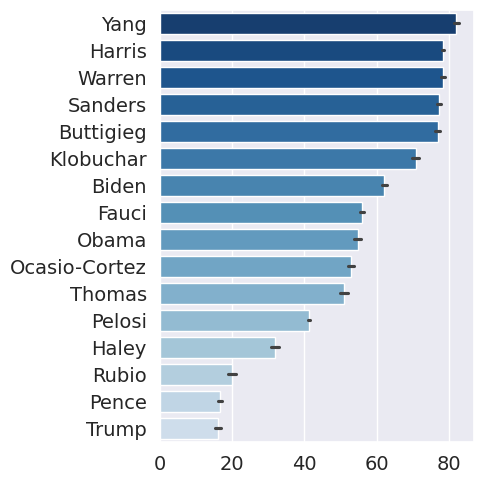

In [12]:
# df_politician_results.to_csv("rank_plots.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})

palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()

ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('rankings/finetuned_gpt2_pred_dem_rank.png', bbox_inches = "tight")

/tmp/ipykernel_552484/3930159039.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)
/tmp/ipykernel_552484/3930159039.py:6: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)


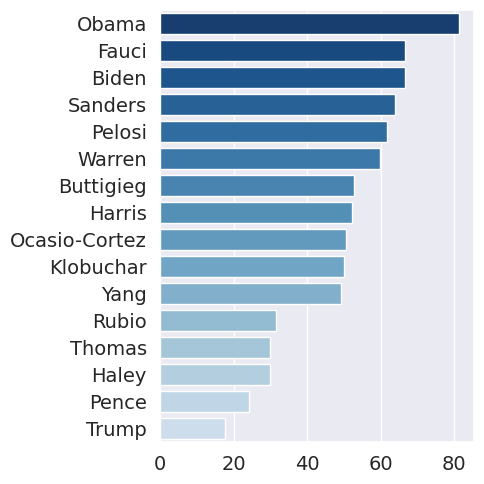

In [13]:
sns.set(rc={'figure.figsize':(5,5)})

palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()

ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('rankings/gold_dem_rank.png', bbox_inches = "tight")

/tmp/ipykernel_552484/1423692872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)
/tmp/ipykernel_552484/1423692872.py:4: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)


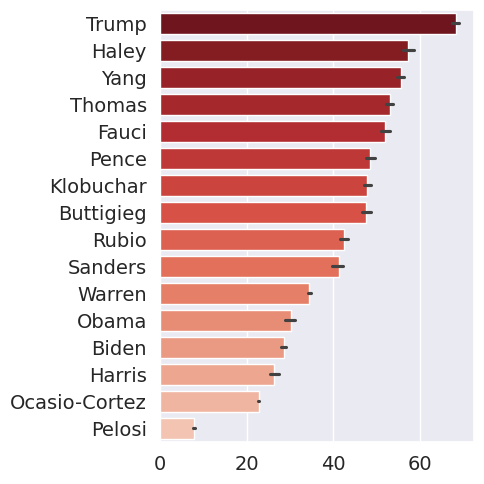

In [14]:
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()

ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('rankings/finetuned_gpt2_pred_repub_rank.png', bbox_inches = "tight")

/tmp/ipykernel_552484/2880239842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)
/tmp/ipykernel_552484/2880239842.py:4: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)


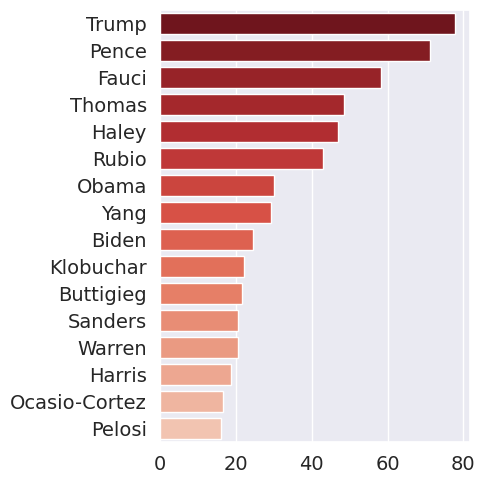

In [15]:
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()

ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('rankings/gold_repub_rank.png', bbox_inches = "tight")